In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob
from sklearn.metrics import auc

In [18]:
def plot_roc(fpr,tpr,ax):
    ax.plot(fpr,tpr,linewidth=4,alpha=0.5,color='darkred',label="AUC=%.2f"%auc(fpr,tpr))

In [19]:
def plot_pr(prec,rec,ax):
    prec = np.maximum.accumulate(prec)
    ax.plot(rec,prec,linewidth=4,alpha=0.5,color='darkred',label="AUC=%.2f"%auc(rec,prec))

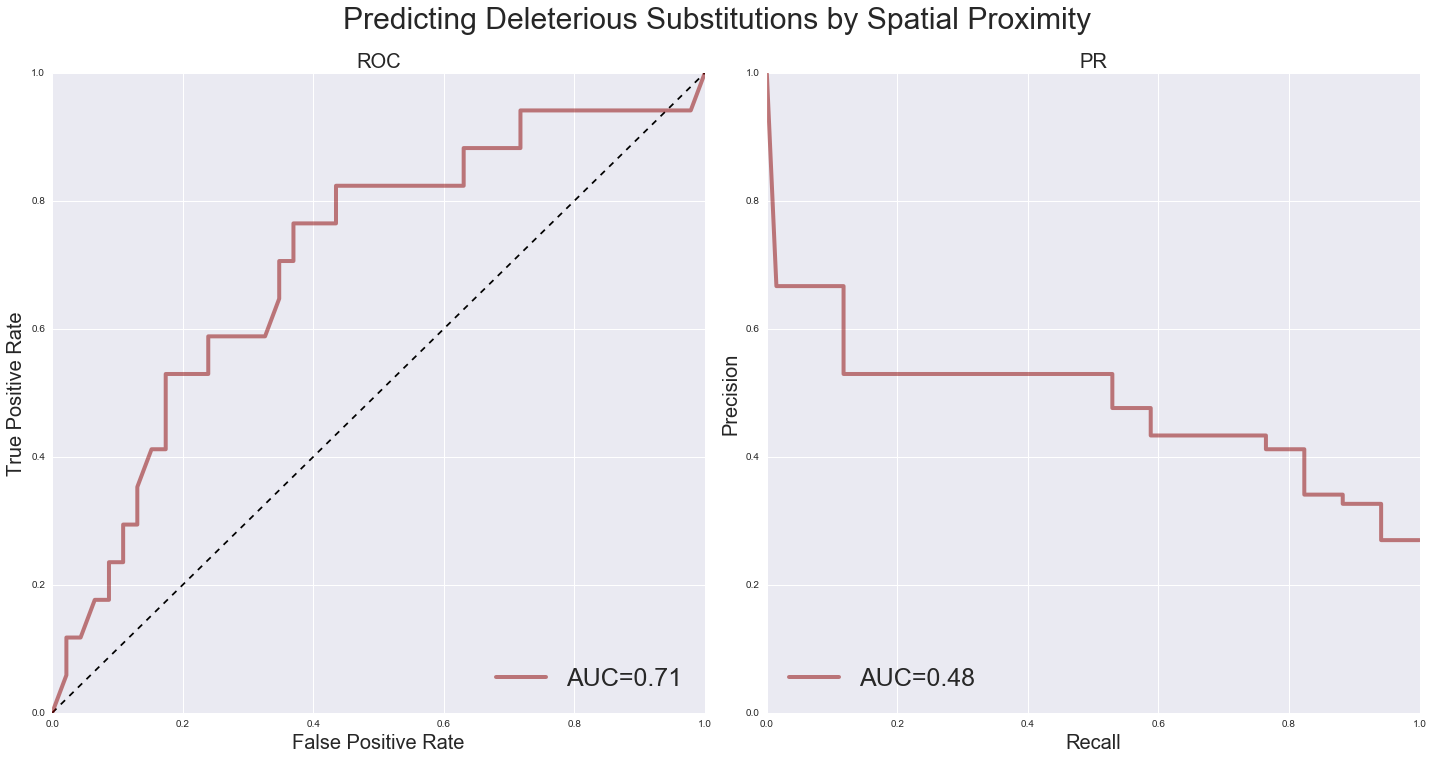

In [24]:
plot_roc.sum_rocauc = 0
plot_pr.sum_prauc   = 0
fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.suptitle("Predicting Deleterious Substitutions by Spatial Proximity",fontsize=30,y=1.05)
ax[0].set_title("ROC",fontsize=20)
ax[1].set_title("PR",fontsize=20)
ax[0].plot([0,1],[0,1],'k--')
ax[0].set_xlim([0.,1.])
ax[0].set_ylim([0.,1.])
ax[1].set_xlim([0.,1.])
ax[1].set_ylim([0.,1.])
ax[0].set_xlabel("False Positive Rate",fontsize=20)
ax[0].set_ylabel("True Positive Rate",fontsize=20)
ax[1].set_xlabel("Recall",fontsize=20)
ax[1].set_ylabel("Precision",fontsize=20)

# Plot the ROC curves
i=0
for f in iglob("/Volumes/sivleyrm/pdbmap/results/KCNQ1_IpWT/multivariate/*roc*.txt.gz"):
    i+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
    plot_roc(df["fpr"],df["tpr"],ax=ax[0])
    
# Plot the PR curves
j=0
for f in iglob("/Volumes/sivleyrm/pdbmap/results/KCNQ1_IpWT/multivariate/*pr*.txt.gz"):
    j+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
    plot_pr(df["prec"],df["rec"],ax=ax[1])

ax[0].legend(loc="lower right",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.tight_layout()
plt.show()